In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
import sys
sys.path.append('../')
PATH = sys.path[0]

In [2]:
CONFIGS = [
    # S10 MNIST
    ("S10_mnist", 'leaky_10'),
    ("S10_mnist", 'rleaky_10'),
    ("S10_mnist", 'lapicque_10'),
    ("S10_mnist", 'alpha_10'),  
    ("S10_mnist", 'synaptic_10'),
    ("S10_mnist", 'rsynaptic_10'),
    # S50 MNIST
    ("S50_mnist", 'leaky_50'),
    ("S50_mnist", 'rleaky_50'),
    ("S50_mnist", 'lapicque_50'),
    ("S50_mnist", 'alpha_50'), 
    ("S50_mnist", 'synaptic_50'),
    ("S50_mnist", 'rsynaptic_50'),
    # S10 FMNIST
    ("S10_fmnist", 'leaky_10'),
    ("S10_fmnist", 'rleaky_10'),
    ("S10_fmnist", 'lapicque_10'),
    ("S10_fmnist", 'alpha_10'),
    ("S10_fmnist", 'synaptic_10'),
    ("S10_fmnist", 'rsynaptic_10'),
    # S50 FMNIST
    ("S50_fmnist", 'leaky_50'),
    ("S50_fmnist", 'rleaky_50'),
    ("S50_fmnist", 'lapicque_50'),
    ("S50_fmnist", 'alpha_50'), 
    ("S50_fmnist", 'synaptic_50'),
    ("S50_fmnist", 'rsynaptic_50'),
    # S10 CIFAR10
    ("S10_cifar10", 'leaky_10'),
    ("S10_cifar10", 'rleaky_10'),
    ("S10_cifar10", 'lapicque_10'),
    ("S10_cifar10", 'alpha_10'),
    ("S10_cifar10", 'synaptic_10'),
    ("S10_cifar10", 'rsynaptic_10'),
    # S50 CIFAR10
    ("S50_cifar10", 'leaky_50'),
    ("S50_cifar10", 'rleaky_50'),
    ("S50_cifar10", 'lapicque_50'),
    ("S50_cifar10", 'synaptic_50'),
    ("S50_cifar10", 'alpha_50'), 
    ("S50_cifar10", 'rsynaptic_50'),
    # S10 CIFAR100
    ("S10_cifar100", 'leaky_10'),
    ("S10_cifar100", 'rleaky_10'),
    ("S10_cifar100", 'lapicque_10'),
    ("S10_cifar100", 'alpha_10'),
    ("S10_cifar100", 'synaptic_10'),
    ("S10_cifar100", 'rsynaptic_10'),
    # S50 CIFAR100
    ("S50_cifar100", 'leaky_50'),
    ("S50_cifar100", 'rleaky_50'),
    ("S50_cifar100", 'lapicque_50'),
    ("S50_cifar100", 'alpha_50'), 
    ("S50_cifar100", 'synaptic_50'),
    ("S50_cifar100", 'rsynaptic_50'),
    # S10 BAF
    ("S10_baf", 'leaky_10'),
    ("S10_baf", 'rleaky_10'),
    ("S10_baf", 'lapicque_10'), 
    ("S10_baf", 'alpha_10'),
    ("S10_baf", 'synaptic_10'),
    ("S10_baf", 'rsynaptic_10'),
    # S50 BAF
    ("S50_baf", 'leaky_50'),
    ("S50_baf", 'rleaky_50'),
    ("S50_baf", 'lapicque_50'), 
    ("S50_baf", 'alpha_50'),    
    ("S50_baf", 'synaptic_50'),
    ("S50_baf", 'rsynaptic_50'),
    # S10 UNSW-NB15
    ("S10_unsw_nb15", 'leaky_10'),
    ("S10_unsw_nb15", 'rleaky_10'),
    ("S10_unsw_nb15", 'lapicque_10'),
    ("S10_unsw_nb15", 'alpha_10'),
    ("S10_unsw_nb15", 'synaptic_10'),
    ("S10_unsw_nb15", 'rsynaptic_10'),
    # S50 UNSW-NB15
    ("S50_unsw_nb15", 'leaky_50'), 
    ("S50_unsw_nb15", 'rleaky_50'),   
    ("S50_unsw_nb15", 'lapicque_50'),  
    ("S50_unsw_nb15", 'alpha_50'), 
    ("S50_unsw_nb15", 'synaptic_50'),  
    ("S50_unsw_nb15", 'rsynaptic_50'),
]
studies_dict = {}
for db, study_name in CONFIGS:
    try:
        study = optuna.load_study(study_name=study_name, storage=f'sqlite:///results/{db}.db')
        db = db.replace('unsw_nb15', 'unsw-nb15')
        studies_dict[f"{db}_{study_name.split('_')[0]}"] = study
    except:
        print(f"Study {study_name} not found for {db}")
        continue

In [3]:
df = pd.DataFrame()
for study_name, study in studies_dict.items():
    df_study = study.trials_dataframe()
    df_study['dataset'] = study_name.split('_')[1]
    df_study['neuron'] = study_name.split('_')[2]
    df = pd.concat([df, df_study])
df

,number,value,datetime_start,datetime_complete,duration,params_batch,params_beta,params_epochs,params_seed,params_steps,...,user_attrs_power_test,user_attrs_power_train,user_attrs_time_test,user_attrs_time_train,state,dataset,neuron,params_recurrent,user_attrs_metric_fpr,params_alpha
0,0,0.987200,2025-02-21 20:55:12.688673,2025-02-21 20:57:05.262293,0 days 00:01:52.573620,1024,0.755295,10,121958,10,...,94.789216,114.301984,1.502428,110.797272,COMPLETE,mnist,leaky,NaN,NaN,NaN
1,1,0.987600,2025-02-21 20:57:05.324048,2025-02-21 20:58:57.425471,0 days 00:01:52.101423,1024,0.120403,10,671155,10,...,100.872990,120.824842,1.519396,110.461315,COMPLETE,mnist,leaky,NaN,NaN,NaN
2,2,0.983500,2025-02-21 20:58:57.478603,2025-02-21 21:00:49.170776,0 days 00:01:51.692173,1024,0.502882,10,131932,10,...,102.320640,123.304749,1.512608,110.055372,COMPLETE,mnist,leaky,NaN,NaN,NaN
3,3,0.983100,2025-02-21 21:00:49.226012,2025-02-21 21:02:41.399660,0 days 00:01:52.173648,1024,0.817295,10,365838,10,...,97.832104,123.190736,1.529600,110.525023,COMPLETE,mnist,leaky,NaN,NaN,NaN
4,4,0.926900,2025-02-21 21:02:41.452163,2025-02-21 21:04:33.386660,0 days 00:01:51.934497,1024,0.625038,10,259178,10,...,99.809517,123.195603,1.516729,110.290820,COMPLETE,mnist,leaky,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,0.008223,2025-03-10 09:02:45.974354,2025-03-10 09:17:57.171192,0 days 00:15:11.196838,1024,0.472982,10,315139,50,...,94.273037,98.756786,35.071332,875.272430,COMPLETE,unsw-nb15,rsynaptic,0.720664,NaN,0.620500
96,96,0.135209,2025-03-10 09:17:57.419097,2025-03-10 09:33:16.242696,0 days 00:15:18.823599,1024,0.347750,10,171829,50,...,94.596802,99.017605,35.321162,882.667701,COMPLETE,unsw-nb15,rsynaptic,0.736220,NaN,0.675613
97,97,0.135209,2025-03-10 09:33:16.491479,2025-03-10 09:48:41.398127,0 days 00:15:24.906648,1024,0.817086,10,271836,50,...,93.898579,98.731378,35.675566,888.393216,COMPLETE,unsw-nb15,rsynaptic,0.559132,NaN,0.887879
98,98,0.135209,2025-03-10 09:48:41.672372,2025-03-10 10:04:18.464679,0 days 00:15:36.792307,1024,0.530387,10,438974,50,...,93.939122,98.228660,35.839999,900.112692,COMPLETE,unsw-nb15,rsynaptic,0.700557,NaN,0.720262


In [ ]:
df = df.rename(columns={
    'params_steps': 'steps',
    'user_attrs_metric_accuracy': 'accuracy',
    'user_attrs_metric_precision': 'precision',
    'user_attrs_metric_recall': 'recall',
    'user_attrs_metric_f1': 'f1',
    'user_attrs_time_train': 'time_train',
    'user_attrs_time_test': 'time_test',
    'user_attrs_energy_train': 'energy_train',
    'user_attrs_energy_test': 'energy_test',
    'user_attrs_power_train': 'power_train',
    'user_attrs_power_test': 'power_test'
})
df['steps'] = df['steps'].astype(int)
selected_df = df[['neuron', 'steps', 'energy_train', 'energy_test', 'power_train', 'power_test']]
selected_df['neuron'] = pd.Categorical(selected_df['neuron'], ['leaky', 'rleaky', 'synaptic', 'rsynaptic', 'lapicque', 'alpha'])
selected_df

,neuron,steps,energy_train,energy_test,power_train,power_test
0,leaky,10,12664.348,142.414,114.301984,94.789216
1,leaky,10,13346.471,153.266,120.824842,100.872990
2,leaky,10,13570.350,154.771,123.304749,102.320640
3,leaky,10,13615.659,149.644,123.190736,97.832104
4,leaky,10,13587.344,151.384,123.195603,99.809517
...,...,...,...,...,...,...
95,rsynaptic,50,86439.092,3306.281,98.756786,94.273037
96,rsynaptic,50,87399.642,3341.269,99.017605,94.596802
97,rsynaptic,50,87712.286,3349.885,98.731378,93.898579
98,rsynaptic,50,88416.864,3366.778,98.228660,93.939122


In [ ]:
selected_df['neuron'] = selected_df['neuron'].replace({
    'leaky': 'LIF',
    'rleaky': 'R-LIF',
    'synaptic': 'SC-LIF',
    'rsynaptic': 'RSC-LIF',
    'lapicque': 'L-LIF',
    'alpha': 'A-LIF',
})

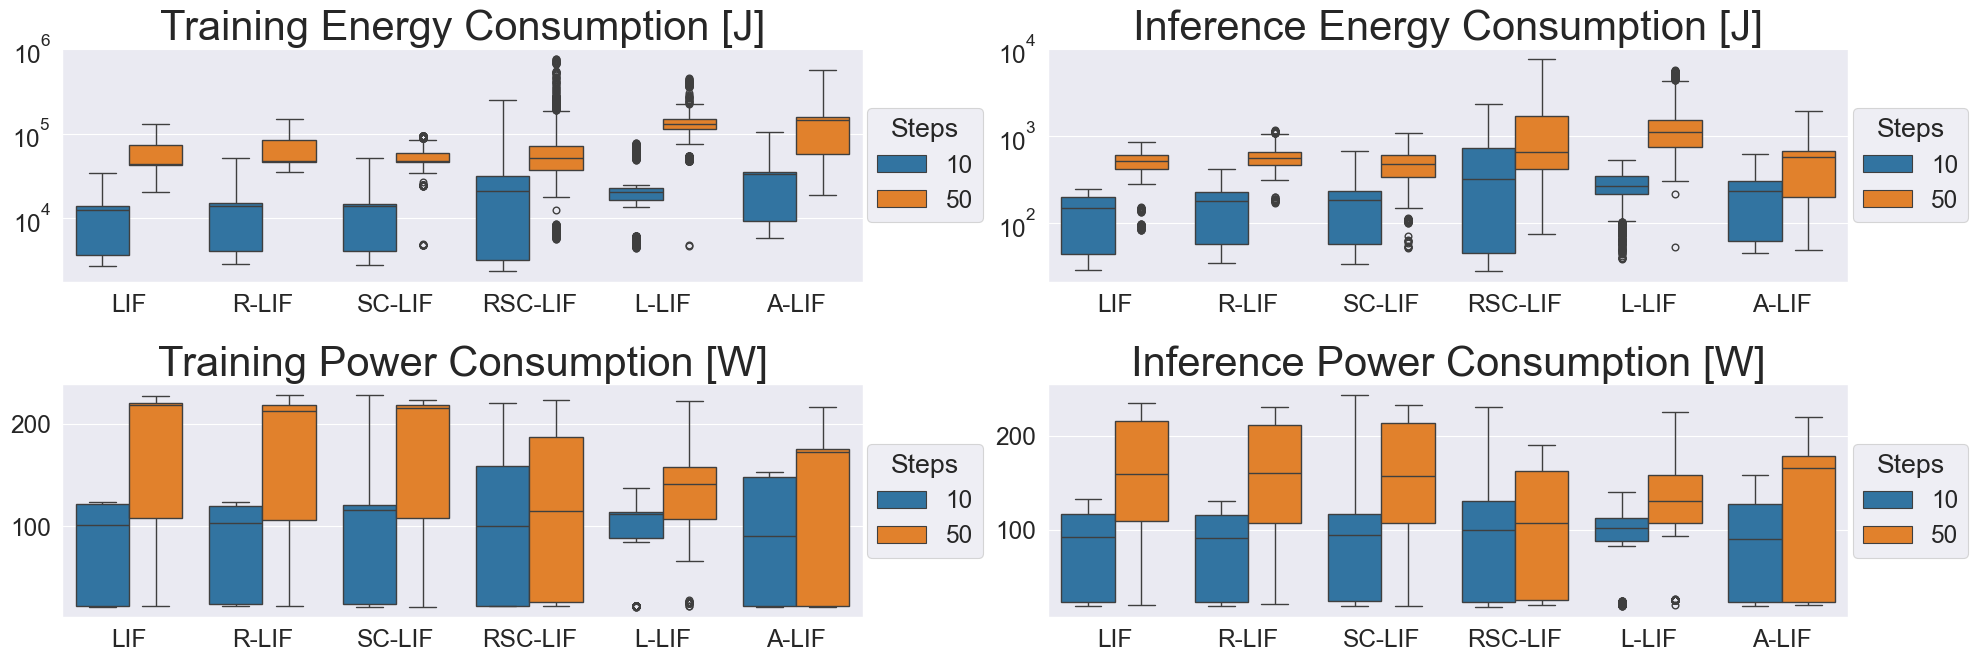

In [6]:
selected_df = selected_df.reset_index(drop=True)
sns.set_theme(style="darkgrid")
sns.set_context("paper", font_scale=2, rc={"axes.titlesize":30})
fig,ax = plt.subplots(2, 2, figsize=(20, 7))
for i, (metric, metric_name) in enumerate([('energy_train', 'Training Energy Consumption [J]'), ('energy_test', 'Inference Energy Consumption [J]'), ('power_train', 'Training Power Consumption [W]'), ('power_test', 'Inference Power Consumption [W]')]):
    g = sns.boxplot(
        data=selected_df, 
        x="neuron", 
        y=metric, 
        hue="steps",
        palette="tab10",
        log_scale=True if i<2 else False,
        ax=ax[i//2, i%2]
    )
    g.set_title(metric_name)
    g.set_ylabel('')
    g.set_xlabel('')
    g.legend(title='Steps', loc='right', bbox_to_anchor=(1.165, 0.5), ncol=1)
plt.tight_layout()
